### Nesta 2° parte da disciplina será utilizado o mesmo projeto da 1° unidade, entretanto iremos realizar:
- uma limpeza, tratamento e análise dos dados utilizando o PySpark;
- Criação de um relatório com os insights obtidos.

### Ferramentas utilizadas:
- PySpark
- gdown
- numpy
- pandas
- seaborn

In [2]:
# 1° ato: carregamento dos dados
import gdown
import pandas as pd
from pyspark.sql import SparkSession

# URL do dados Recife
url = "http://dados.recife.pe.gov.br/dataset/e2bd8f0b-1d62-4323-8159-8ebd6ed9eb4a/resource/77c885c4-76ca-45eb-9209-06c5d217122d/download/licenciamento_urbanistico.csv"

# Baixando o arquivo
output = 'licenciamento_urbanistico.csv'
gdown.download(url, output, quiet=False)

# Verificando o arquivo com pandas
data = pd.read_csv(output, sep=';')
print(data.head())

# Inicializando o SparkSession
spark = SparkSession.builder.appName('licenciamento-urbanistico').getOrCreate()

# Ajustando a configuração para o plano de string
spark.conf.set("spark.sql.debug.maxToStringFields", 1000)

# Lendo o arquivo CSV baixado
df = spark.read.csv(output, header=True, sep=';', inferSchema=True)
df.printSchema()

# Mostrar as primeiras linhas do DataFrame
df.show(5)



Downloading...
From: http://dados.recife.pe.gov.br/dataset/e2bd8f0b-1d62-4323-8159-8ebd6ed9eb4a/resource/77c885c4-76ca-45eb-9209-06c5d217122d/download/licenciamento_urbanistico.csv
To: /home/victoria/PycharmProjects/Big-Data/Trabalho/Parte2/licenciamento_urbanistico.csv
41.0MB [00:05, 7.52MB/s]


  ﻿areatotalconstruida                       assunto            bairro  \
0                  100  APROVACAO DE PROJETO INICIAL            AREIAS   
1                  NaN                  OBRA DE ARTE  BRASILIA TEIMOSA   
2                  NaN                  OBRA DE ARTE  BRASILIA TEIMOSA   
3                   50  APROVACAO DE PROJETO INICIAL            AREIAS   
4                  100  APROVACAO DE PROJETO INICIAL            AREIAS   

  categoria_empreendimento          cnpj data_conclusao data_emissao_licenca  \
0                     Obra  2.088921e+13     2017-05-29           2017-05-29   
1                     Obra  2.088921e+13     2017-05-30                  NaN   
2                     Obra  2.088921e+13     2017-06-01                  NaN   
3                     Obra  2.088921e+13     2017-07-21                  NaN   
4                     Obra  2.088921e+13     2017-07-21                  NaN   

  data_entrada data_pagamento data_validade_licenca  ...  \
0   2017-05-29

24/06/17 00:14:30 WARN Utils: Your hostname, victoria-Inspiron-3583 resolves to a loopback address: 127.0.1.1; using 192.168.1.10 instead (on interface wlo1)
24/06/17 00:14:30 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/17 00:14:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- ﻿areatotalconstruida: string (nullable = true)
 |-- assunto: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- categoria_empreendimento: string (nullable = true)
 |-- cnpj: long (nullable = true)
 |-- data_conclusao: date (nullable = true)
 |-- data_emissao_licenca: date (nullable = true)
 |-- data_entrada: date (nullable = true)
 |-- data_pagamento: date (nullable = true)
 |-- data_validade_licenca: date (nullable = true)
 |-- dsqfl: string (nullable = true)
 |-- empreendimento_de_impacto: string (nullable = true)
 |-- endereco_empreendimento: string (nullable = true)
 |-- inscricao_mercantil: integer (nullable = true)
 |-- licenciamento_ambiental: string (nullable = true)
 |-- licenciamento_sanitario: string (nullable = true)
 |-- licenciamento_urbanistico: string (nullable = true)
 |-- razao_social: string (nullable = true)
 |-- razao_social_mercantil: string (nullable = true)
 |-- num_licenca: long (nullable = true)
 |-- num_processo: long (nullable = tr

In [8]:
pd.DataFrame(df.take(5), columns=df.columns)

,﻿areatotalconstruida,assunto,bairro,categoria_empreendimento,cnpj,data_conclusao,data_emissao_licenca,data_entrada,data_pagamento,data_validade_licenca,...,processo_automatizado,situacao_processo,tipo_mercantil,tipo_processo,tipo_proc_licenciamento,uso_imovel,valor_taxa,valor_pago,latitude,longitude
0,100,APROVACAO DE PROJETO INICIAL,AREIAS,Obra,20889207000176,2017-05-29,2017-05-29,2017-05-29,None,2018-05-29,...,Sim,DEFERIDO,MEI,None,Urbanístico,None,None,None,-8.089069,-34.934006
1,None,OBRA DE ARTE,BRASILIA TEIMOSA,Obra,20889207000176,2017-05-30,None,2017-05-30,None,None,...,Sim,INDEFERIDO,MEI,None,Urbanístico,None,None,None,-8.089069,-34.934006
2,None,OBRA DE ARTE,BRASILIA TEIMOSA,Obra,20889207000176,2017-06-01,None,2017-05-30,None,None,...,Sim,INDEFERIDO,MEI,None,Urbanístico,None,None,None,-8.089069,-34.934006
3,50,APROVACAO DE PROJETO INICIAL,AREIAS,Obra,20889207000176,2017-07-21,None,2017-05-29,None,None,...,Sim,CANCELADO,MEI,None,Urbanístico,None,None,None,-8.089069,-34.934006
4,100,APROVACAO DE PROJETO INICIAL,AREIAS,Obra,20889207000176,2017-07-21,None,2017-05-29,None,None,...,Sim,CANCELADO,MEI,None,Urbanístico,None,None,None,-8.089069,-34.934006


In [9]:
df.groupby('situacao_processo').count().toPandas()

,situacao_processo,count
0,INDEFERIDO,32965
1,DEFERIDO,28601
2,CANCELADO,11074
3,EM TRAMITAÇÃO,522
4,SOLICITADA,1029
5,EM EXIGÊNCIA,776


In [10]:
df.groupby('licenciamento_urbanistico').count().toPandas()

,licenciamento_urbanistico,count
0,Licenciamento(s) solicitado(s) - 8083232623 - ...,11
1,Licenciamento vigente - ALVARA DE CONSTRUCAO I...,27
2,Licenciamento vigente - ALVARA CONSTRUCAO/REFORMA,310
3,Licenciamento vigente - ALVARA DE CONSTRUCAO I...,827
4,Licenciamento expirado - ALVARA DE CONSTRUCAO/...,101
...,...,...
802,Licenciamento(s) solicitado(s) - 8001039024 - ...,1
803,Licenciamento(s) solicitado(s) - 8080503923 - ...,1
804,Licenciamento(s) solicitado(s) - 8073758523 - ...,2
805,Licenciamento(s) solicitado(s) - 8079035523 - ...,1


In [17]:
# Exemplo de estatísticas descritivas
df.describe().show()

+-------+--------------------+--------------------+-------+------------------------+--------------------+------------------+-------------------------+-----------------------+-------------------+-----------------------+-----------------------+-------------------------+--------------------+----------------------+--------------------+-------------------+--------------------+------------------------+---------------------+-----------------+--------------------+-------------------+-----------------------+-----------------+----------------+----------------+-------------------+--------------------+
|summary|﻿areatotalconstruida|             assunto| bairro|categoria_empreendimento|                cnpj|             dsqfl|empreendimento_de_impacto|endereco_empreendimento|inscricao_mercantil|licenciamento_ambiental|licenciamento_sanitario|licenciamento_urbanistico|        razao_social|razao_social_mercantil|         num_licenca|       num_processo|porte_empreendimento|potencial_empreendimento|pro

In [11]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
inscricao_mercantil,46982,5177830.153888723,1774020.1256538099,1,8247625


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74967 entries, 0 to 74966
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ﻿areatotalconstruida       16132 non-null  object 
 1   assunto                    74967 non-null  object 
 2   bairro                     74967 non-null  object 
 3   categoria_empreendimento   74967 non-null  object 
 4   cnpj                       47066 non-null  float64
 5   data_conclusao             72619 non-null  object 
 6   data_emissao_licenca       22859 non-null  object 
 7   data_entrada               74967 non-null  object 
 8   data_pagamento             37031 non-null  object 
 9   data_validade_licenca      22842 non-null  object 
 10  dsqfl                      74537 non-null  object 
 11  empreendimento_de_impacto  30688 non-null  object 
 12  endereco_empreendimento    74541 non-null  object 
 13  inscricao_mercantil        46982 non-null  flo

In [32]:
print(f"Soma de Null:\n{data.isnull().sum()}\n\nSoma de NA:\n{data.isna().sum()}")

Soma de Null:
﻿areatotalconstruida         58835
assunto                          0
bairro                           0
categoria_empreendimento         0
cnpj                         27901
data_conclusao                2348
data_emissao_licenca         52108
data_entrada                     0
data_pagamento               37936
data_validade_licenca        52125
dsqfl                          430
empreendimento_de_impacto    44279
endereco_empreendimento        426
inscricao_mercantil          27985
licenciamento_ambiental      12806
licenciamento_sanitario      12806
licenciamento_urbanistico    12806
razao_social                 27901
razao_social_mercantil       27985
num_licenca                  48887
num_processo                     0
porte_empreendimento         74967
potencial_empreendimento     74967
processo_automatizado            0
situacao_processo                0
tipo_mercantil               13111
tipo_processo                22336
tipo_proc_licenciamento          0
uso_im

In [40]:
try:
    response = requests.get(url)
    response.raise_for_status()  # Lança um erro para respostas não-sucedidas
    # Usando StringIO para converter o texto em um arquivo em memória e, então, lendo com o Pandas
    csv_raw = StringIO(response.text)
    ecom = pd.read_csv(csv_raw)
except requests.RequestException as e:
    print(f"Erro ao acessar o arquivo: {e}")

ParserError: Error tokenizing data. C error: Expected 2 fields in line 25, saw 4


In [19]:
# Remover linhas com valores nulos
df_clean = df.dropna()


In [12]:
# Seleciona as colunas numéricas
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or t[1] == 'double']
numeric_df = df.select(numeric_features).toPandas()

numeric_df.corr()

,inscricao_mercantil,latitude,longitude
inscricao_mercantil,1.000000,-0.023850,0.001246
latitude,-0.023850,1.000000,-0.058417
longitude,0.001246,-0.058417,1.000000


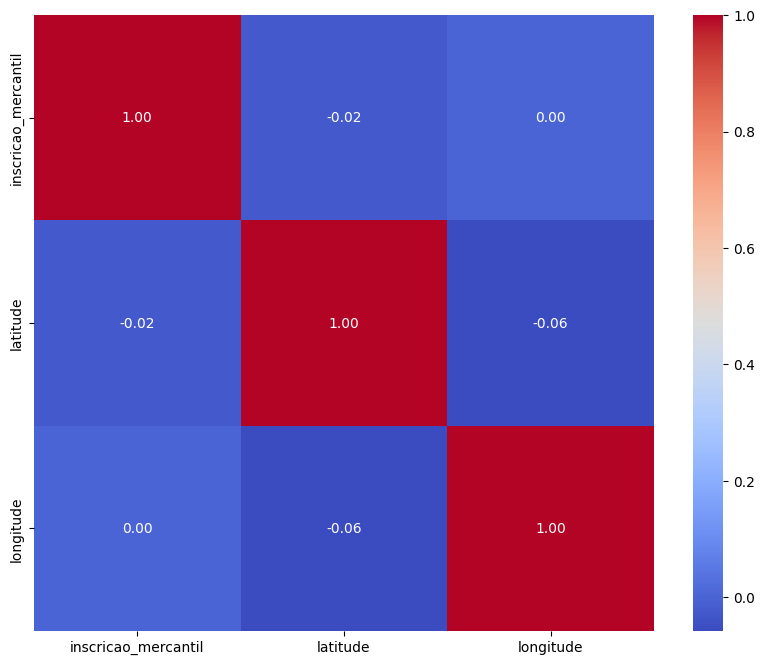

In [15]:
# Opcional: visualiza a matriz de correlação como um mapa de calor
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

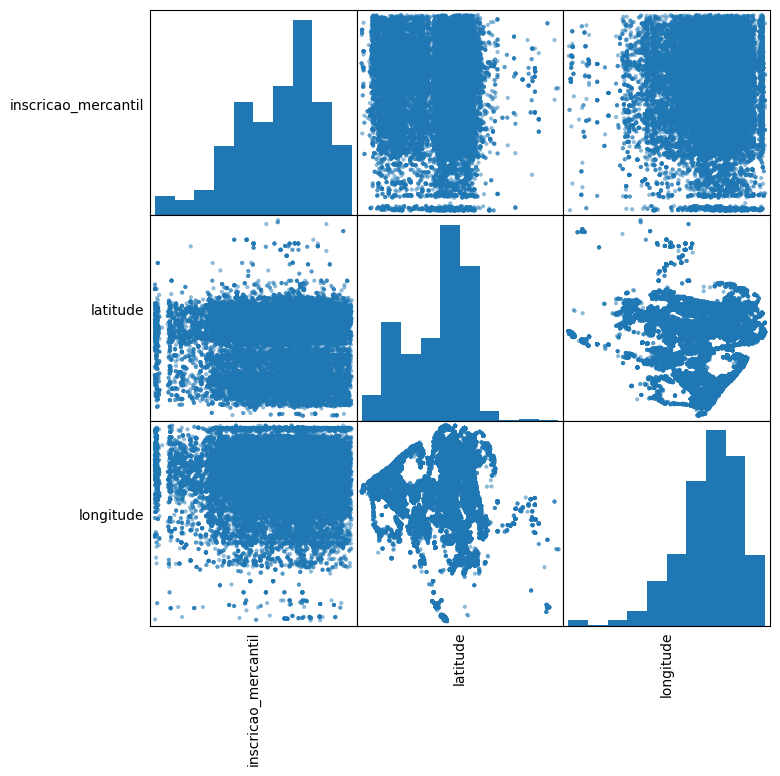

In [16]:
numeric_data = df.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(8, 8));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [3]:
cols = df.columns
df.printSchema()

root
 |-- ﻿areatotalconstruida: string (nullable = true)
 |-- assunto: string (nullable = true)
 |-- bairro: string (nullable = true)
 |-- categoria_empreendimento: string (nullable = true)
 |-- cnpj: long (nullable = true)
 |-- data_conclusao: date (nullable = true)
 |-- data_emissao_licenca: date (nullable = true)
 |-- data_entrada: date (nullable = true)
 |-- data_pagamento: date (nullable = true)
 |-- data_validade_licenca: date (nullable = true)
 |-- dsqfl: string (nullable = true)
 |-- empreendimento_de_impacto: string (nullable = true)
 |-- endereco_empreendimento: string (nullable = true)
 |-- inscricao_mercantil: integer (nullable = true)
 |-- licenciamento_ambiental: string (nullable = true)
 |-- licenciamento_sanitario: string (nullable = true)
 |-- licenciamento_urbanistico: string (nullable = true)
 |-- razao_social: string (nullable = true)
 |-- razao_social_mercantil: string (nullable = true)
 |-- num_licenca: long (nullable = true)
 |-- num_processo: long (nullable = tr

In [4]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

categoricalColumns = ['areatotalconstruida', 'assunto', 'bairro', 'categoria_empreendimento', 'dsqfl',
    'empreendimento_de_impacto', 'endereco_empreendimento', 'licenciamento_ambiental',
    'licenciamento_sanitario', 'licenciamento_urbanistico', 'razao_social',
    'razao_social_mercantil', 'porte_empreendimento', 'potencial_empreendimento',
    'processo_automatizado', 'situacao_processo', 'tipo_mercantil', 'tipo_processo',
    'tipo_proc_licenciamento', 'uso_imovel', 'valor_taxa', 'valor_pago']

stages = []

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCol=stringIndexer.getOutputCol(), outputCol=categoricalCol + 'classVec')
    stages += [stringIndexer, encoder]

# Visualização do estágio
for stage in stages:
    print(stage)

StringIndexer_2ab252a0f051
OneHotEncoder_1e6587d54716
StringIndexer_24508253a75d
OneHotEncoder_a3026632eaf1
StringIndexer_8f143c2c67e1
OneHotEncoder_94a9d7e87693
StringIndexer_01ad04d3160d
OneHotEncoder_9cece4a3bdbb
StringIndexer_f0dd55099847
OneHotEncoder_ff8b284d2f8d
StringIndexer_591391e2c15b
OneHotEncoder_b220206e670b
StringIndexer_244ba6d86516
OneHotEncoder_771611af5c2b
StringIndexer_425e4dcb019e
OneHotEncoder_609357727e9d
StringIndexer_69a82c50a18a
OneHotEncoder_5bb5f10d1b32
StringIndexer_2c7728752545
OneHotEncoder_300e5cf55507
StringIndexer_a07711fd4501
OneHotEncoder_24013c89aea7
StringIndexer_1e3e55e93a57
OneHotEncoder_18a89823c1d4
StringIndexer_80f97a1ac759
OneHotEncoder_2b8fbf9f8dc4
StringIndexer_61d4c0ff8509
OneHotEncoder_2a2b69c20cec
StringIndexer_9c985e80f404
OneHotEncoder_619d502a78ef
StringIndexer_10fdc0790585
OneHotEncoder_09501fa74c07
StringIndexer_1e653129f38a
OneHotEncoder_23d3f97df81f
StringIndexer_4621cf827efc
OneHotEncoder_56ec5d612a0d
StringIndexer_3d7d2d149993
O

In [ ]:
label_stringIdx = StringIndexer(inputCol = 'deposit', outputCol = 'label')

stages += [label_stringIdx]

numericCols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols

assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")

stages += [assembler]